#  **Import modules**


In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load the Dataset

In [2]:
# using the empty lists to create a dataframe
paths = []
labels = []

In [3]:
#Derive the labels from the filename
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #appends the paths to the paths list
        paths.append(os.path.join(dirname, filename)) 
        #Split the filenames to get the labels using '_' for eg.YAF_jail_happy.wav we get happy.wav
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())


In [4]:
paths[:5]
 

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [5]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [6]:
# Create a dataframe
df = pd.DataFrame()
df['speech'] = pd.Series(paths)
df['label'] = pd.Series(labels)
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [7]:
df['label'].value_counts()

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

## EDA

<Axes: xlabel='label', ylabel='count'>

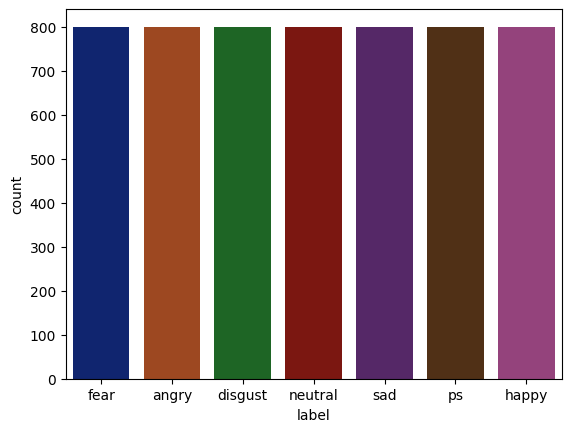

In [8]:
sns.countplot(data=df, x='label', palette = 'dark')

Displaying waveplots and spectograms

In [9]:
# Function to display the waveplot
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size = 22)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

# Function to display the spectogram
def spectogram(data,sr,emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size = 22)
    librosa.display.specshow(xdb, sr=sr, x_axis='time',y_axis = 'hz')
    plt.colorbar

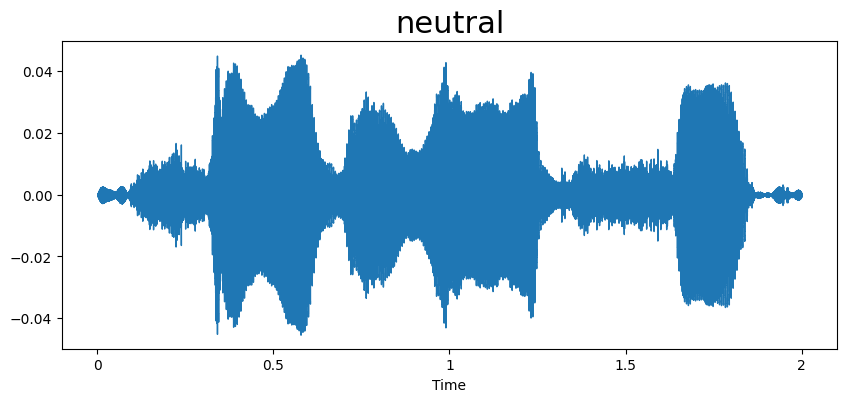

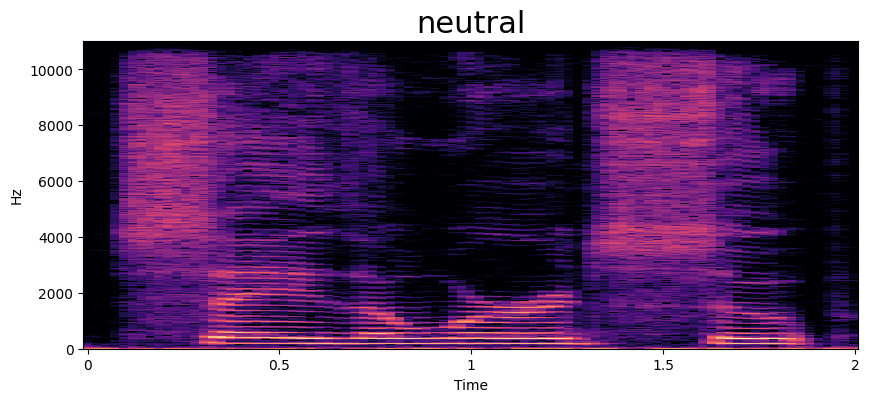

In [10]:
# Waveform and Spectograms for neutral emotion
emotion = 'neutral'
df1 = df[df['label']==emotion]
path =df1['speech'].iloc[0]
data, sampling_rate = librosa.load(path) 
#Loads audio from a specified file path.
#Stores the audio waveform as a NumPy array in the data variable.
#Captures the sampling rate (in Hz) in the sampling_rate variable.

waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)



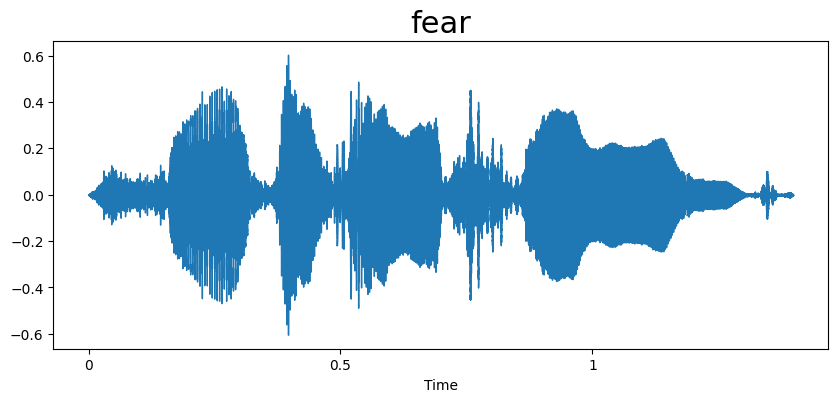

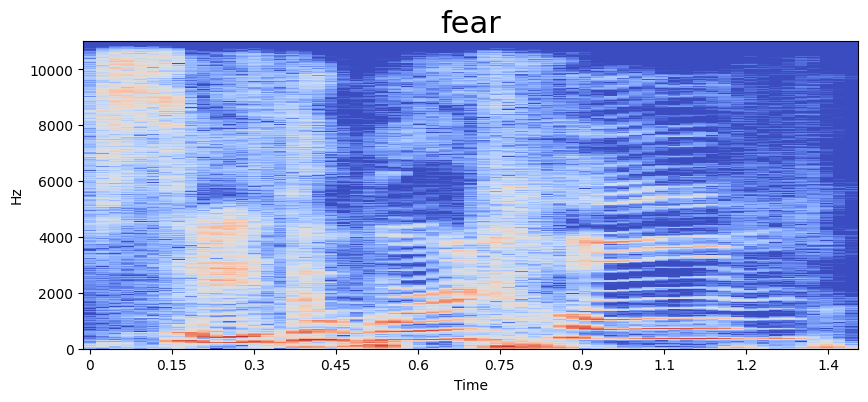

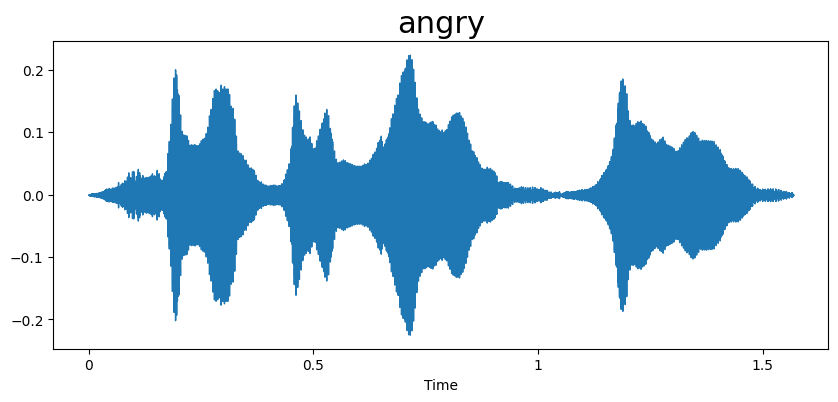

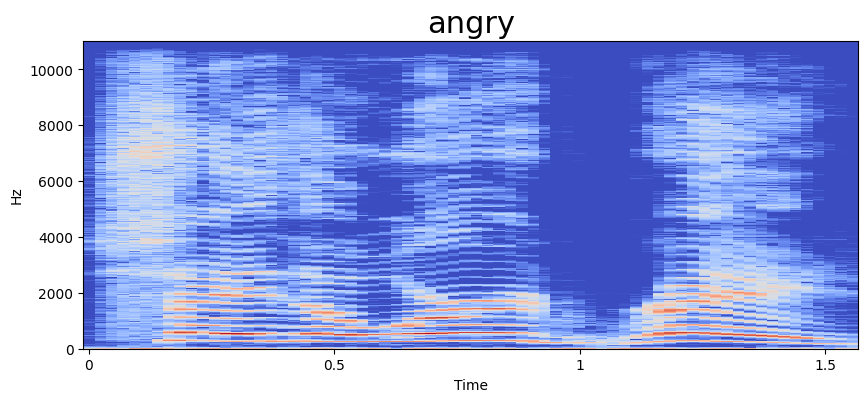

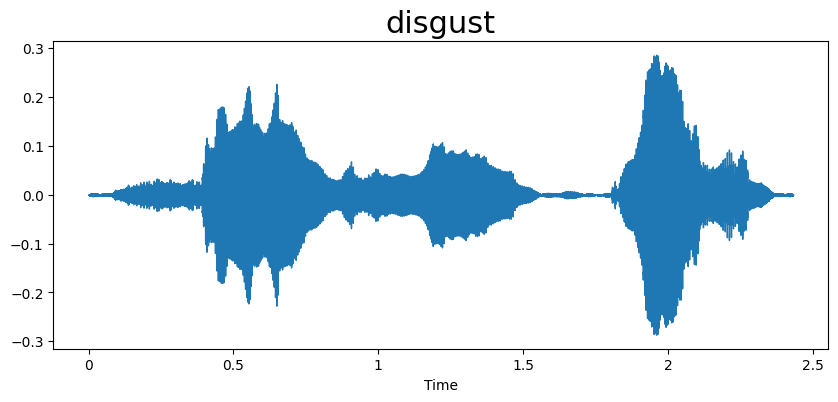

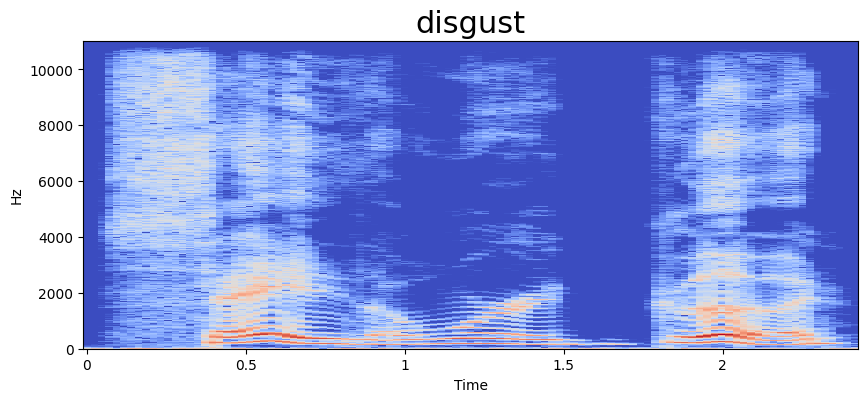

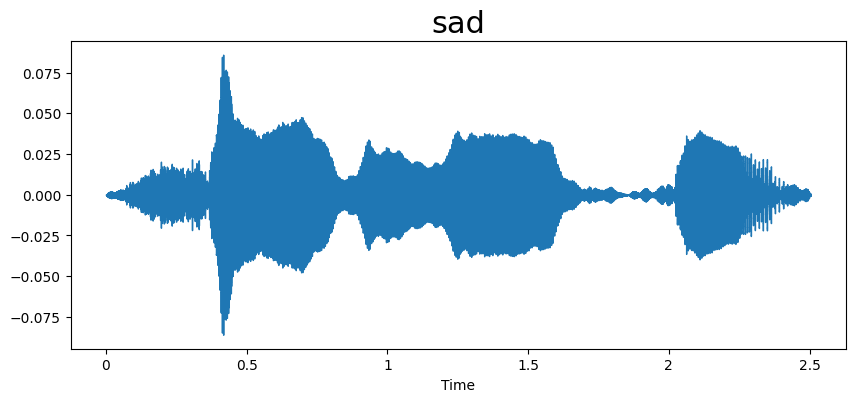

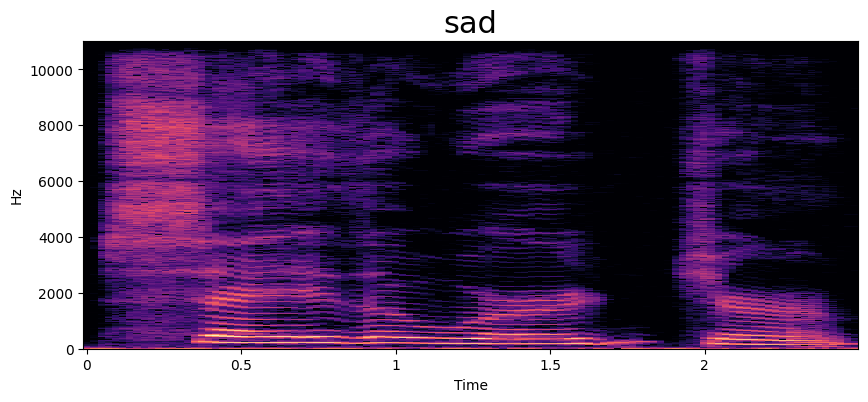

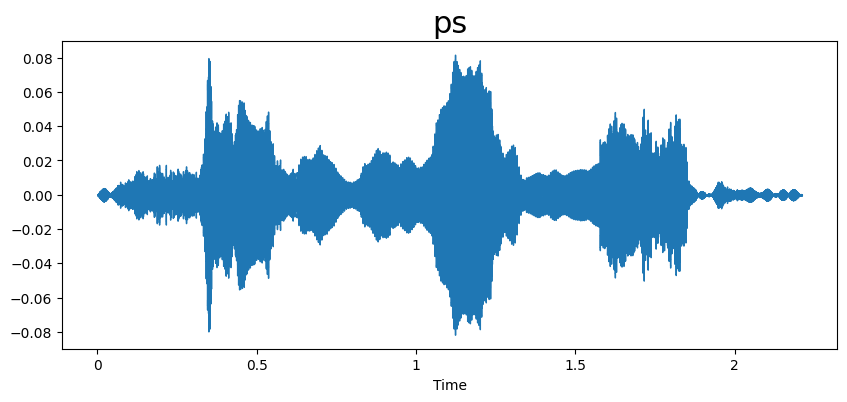

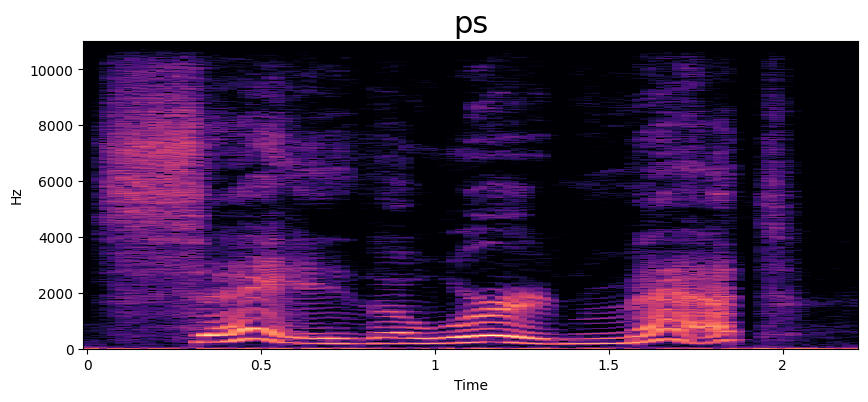

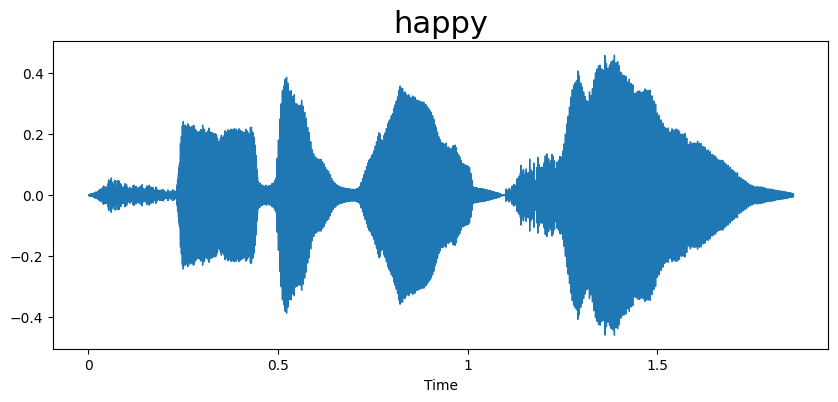

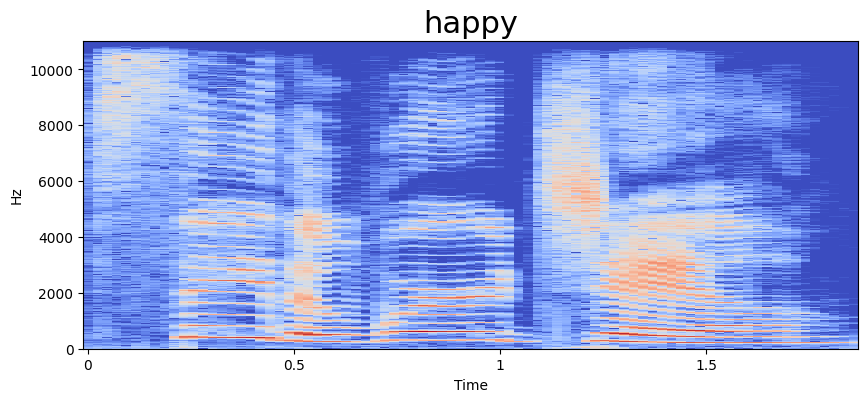

In [11]:
# Waveform and Spectograms for the remaining emotions
import time
lb = list(df['label'].unique())
lb.remove('neutral')
for i in lb:
    emotion = i
    df1 = df[df['label']==emotion]
    path =df1['speech'].iloc[0]
    data, sampling_rate = librosa.load(path) 
    waveplot(data,sampling_rate, emotion)
    spectogram(data,sampling_rate, emotion)
    Audio(path)
   
    

## Feature Extraction
1. Technique used : Extraction of MFCC
2. MFCC is a technique used in audio signal processing to extract essential characteristics of audio signals, particularly in speech and audio analysis.


**def extract_mfcc(filename)**

Function Purpose: This function extracts important features from an audio file.

Audio Processing: It reads a 3-second portion of the audio starting from 0.5 seconds in, then computes the mean of 40 Mel-frequency cepstral coefficients (MFCCs) to represent the audio's characteristics.

Use Case: This is useful for converting audio into a compact set of numbers that can be used for tasks like speech recognition or audio classification.







In [12]:
# Function to extract MFCC
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    return mfcc
    

In [13]:
extract_mfcc(df['speech'][0])

array([-285.7373    ,   85.78295   ,   -2.1689105 ,   22.125532  ,
        -14.757396  ,   11.051346  ,   12.412452  ,   -3.0002632 ,
          1.0844971 ,   11.078272  ,  -17.419662  ,   -8.093215  ,
          6.5879736 ,   -4.220953  ,   -9.15508   ,    3.521479  ,
        -13.186381  ,   14.078853  ,   19.669733  ,   22.725618  ,
         32.574642  ,   16.325031  ,   -3.8427277 ,    0.89629626,
        -11.239262  ,    6.653462  ,   -2.5883691 ,   -7.7140174 ,
        -10.941658  ,   -2.4007556 ,   -5.2812862 ,    4.2711563 ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.8697433 ,
         -1.6027985 ,    2.5600505 ,   11.454375  ,   11.23345   ],
      dtype=float32)

In [15]:
'''This code processes each file path in the 'speech' column of the DataFrame using the 
extract_mfcc function and stores the resulting MFCC features in the X_mfcc variable, 
creating a new data structure that represents the MFCC features for each audio file 
in the DataFrame.'''
X_mfcc = df['speech'].apply(lambda x:extract_mfcc(x))

In [18]:
X_mfcc

0       [-285.7373, 85.78295, -2.1689105, 22.125532, -...
1       [-348.34332, 35.193233, -3.8413274, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.6343, 21.25971, -4.4110823, 6.4871554, -...
4       [-344.7548, 46.329193, -24.171415, 19.392921, ...
                              ...                        
5595    [-374.39523, 60.865, 0.025058376, 8.431059, -2...
5596    [-313.9648, 39.847843, -5.6493053, -3.8675752,...
5597    [-357.54886, 77.88606, -15.224756, 2.1946328, ...
5598    [-353.14743, 101.68391, -14.175895, -12.037377...
5599    [-389.4595, 54.042767, 1.3469967, -1.4258995, ...
Name: speech, Length: 5600, dtype: object

In [20]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [21]:
#This function is used to add a new dimension to the X_mfcc array to make it acceptable to the LSTM model
X = np.expand_dims(X, -1) 
X.shape

(5600, 40, 1)

In [24]:
#Conversion of the labels to categorical values
from sklearn.preprocessing  import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])


In [34]:
y = y.toarray()

In [35]:
y.shape

(5600, 7)

## LSTM Model Building

In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout



In [33]:
model = Sequential([
    LSTM(123, return_sequences = False, input_shape=(40,1)),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(7, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

In [36]:
# Train the model
history = model.fit(X, y, validation_split = 0.2, epochs=100, batch_size = 512, shuffle = True)

Epoch 1/100
9/9 [==============================] - 9s 87ms/step - loss: 1.8727 - accuracy: 0.2871 - val_loss: 1.9648 - val_accuracy: 0.1071
Epoch 2/100
9/9 [==============================] - 0s 18ms/step - loss: 1.5658 - accuracy: 0.4846 - val_loss: 1.8637 - val_accuracy: 0.1071
Epoch 3/100
9/9 [==============================] - 0s 16ms/step - loss: 1.1759 - accuracy: 0.6196 - val_loss: 1.8497 - val_accuracy: 0.1071
Epoch 4/100
9/9 [==============================] - 0s 16ms/step - loss: 0.8486 - accuracy: 0.7107 - val_loss: 1.3610 - val_accuracy: 0.3554
Epoch 5/100
9/9 [==============================] - 0s 16ms/step - loss: 0.6440 - accuracy: 0.7587 - val_loss: 1.0002 - val_accuracy: 0.5821
Epoch 6/100
9/9 [==============================] - 0s 14ms/step - loss: 0.4846 - accuracy: 0.8297 - val_loss: 0.6975 - val_accuracy: 0.7304
Epoch 7/100
9/9 [==============================] - 0s 14ms/step - loss: 0.3833 - accuracy: 0.8643 - val_loss: 0.4933 - val_accuracy: 0.8107
Epoch 8/100
9/9 [===

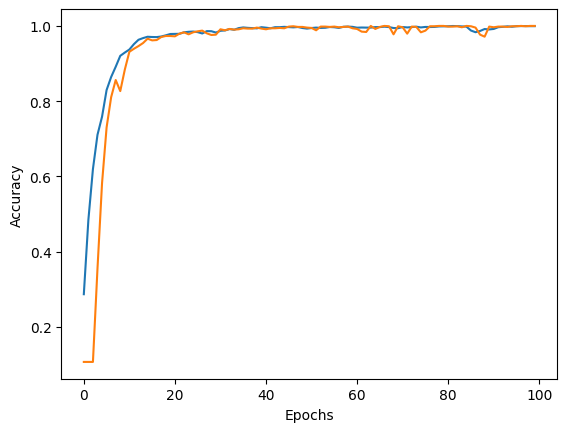

In [40]:
# Plotting the Accuracy
epochs = list(range(100))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'train accuracy')
plt.plot(epochs, val_acc, label = 'val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()





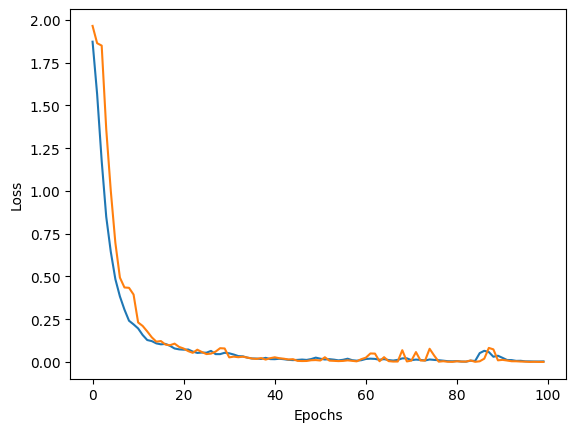

In [41]:
# Plotting the Loss
epochs = list(range(100))

acc = history.history['loss']
val_acc = history.history['val_loss']

plt.plot(epochs, acc, label = 'train loss')
plt.plot(epochs, val_acc, label = 'val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



